# <center>2016 US Election Primaries

# <center>1. Introduction

<pre>
The Primary results from the American elections were analyzed in order to understand the variables which impact the 
results. By developing series of questions with in the flow of anlaysis the demographics of each county have been 
anlaysed. Exploratory Data Analysis being the main task to explore the various demographis and how these factors are influencing 
in choosing the candidate. However considering the requirement of project the Analysis has been done focusing where Democrats can improve their vote by demographics.

It is advisable to understand how elections are being conducted in US.

<b>Dataset:</b>
The dataset, 2016 US Election used for this project has been taken from Kaggle.
</pre>

# <center>2. Prerequisites and Data

## 2.1 Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import warnings
import statistics
from my_functions import *
from scipy.stats import f_oneway,stats
import plotly.express as px
import opendatasets as od
import os

## 2.2 Data Loading and Observations

<pre>Datset for the particular analysis is taken from Kaggle. Using an API, the datest is downloaded and loaded for analysis.

In [3]:
dataset=r"https://www.kaggle.com/datasets/benhamner/2016-us-election"
od.download(dataset, force=True)

  0%|                                                                                      | 0.00/17.0M [00:00<?, ?B/s]

100%|██████████████████████████████████████████████████████████████████████████████| 17.0M/17.0M [00:34<00:00, 520kB/s]


<pre>Verifying all the files downloaded from the kaggle page from 2016-us-election.

In [90]:
import os
data_dir=r'.\2016-us-election'
os.listdir(data_dir)

['county_facts.csv',
 'county_facts_dictionary.csv',
 'county_shapefiles',
 'database.sqlite',
 'hashes.txt',
 'primary_results.csv']

In [3]:
def warning_fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    '''
    In this statement warning are being suppressed/ignored
    '''
    warnings.simplefilter("ignore")
    warning_fxn()
    
    pd.set_option('display.max_colwidth', -1) # method to avoid truncated text from the files
    primaries=pd.read_csv(r".\2016-us-election\primary_results.csv")
    county_facts=pd.read_csv(r".\2016-us-election\county_facts.csv")
    dictionary=pd.read_csv(r".\2016-us-election\county_facts_dictionary.csv")

FileNotFoundError: [Errno 2] No such file or directory: '.\\2016-us-election\\primary_results.csv'

### 2.1.1 Initial cheking of primary results dataset

In [92]:
dictionary

column_name  \
0   PST045214    
1   PST040210    
2   PST120214    
3   POP010210    
4   AGE135214    
5   AGE295214    
6   AGE775214    
7   SEX255214    
8   RHI125214    
9   RHI225214    
10  RHI325214    
11  RHI425214    
12  RHI525214    
13  RHI625214    
14  RHI725214    
15  RHI825214    
16  POP715213    
17  POP645213    
18  POP815213    
19  EDU635213    
20  EDU685213    
21  VET605213    
22  LFE305213    
23  HSG010214    
24  HSG445213    
25  HSG096213    
26  HSG495213    
27  HSD410213    
28  HSD310213    
29  INC910213    
30  INC110213    
31  PVY020213    
32  BZA010213    
33  BZA110213    
34  BZA115213    
35  NES010213    
36  SBO001207    
37  SBO315207    
38  SBO115207    
39  SBO215207    
40  SBO515207    
41  SBO415207    
42  SBO015207    
43  MAN450207    
44  WTN220207    
45  RTN130207    
46  RTN131207    
47  AFN120207    
48  BPS030214    
49  LND110210    
50  POP060210    

                                                               description  
0   Population, 2014 estimate                                               
1   Population, 2010 (April 1) estimates base                               
2   Population, percent change - April 1, 2010 to July 1, 2014              
3   Population, 2010                                                        
4   Persons under 5 years, percent, 2014                                    
5   Persons under 18 years, percent, 2014                                   
6   Persons 65 years and over, percent, 2014                                
7   Female persons, percent, 2014                                           
8   White alone, percent, 2014                                              
9   Black or African American alone, percent, 2014                          
10  American Indian and Alaska Native alone, percent, 2014                  
11  Asian alone, percent, 2014                                              
12  Native Hawaiian and Other Pacific Islander alone, percent, 2014         
13  Two or More Races, percent, 2014                                        
14  Hispanic or Latino, percent, 2014                                       
15  White alone, not Hispanic or Latino, percent, 2014                      
16  Living in same house 1 year & over, percent, 2009-2013                  
17  Foreign born persons, percent, 2009-2013                                
18  Language other than English spoken at home, pct age 5+, 2009-2013       
19  High school graduate or higher, percent of persons age 25+, 2009-2013   
20  Bachelor's degree or higher, percent of persons age 25+, 2009-2013      
21  Veterans, 2009-2013                                                     
22  Mean travel time to work (minutes), workers age 16+, 2009-2013          
23  Housing units, 2014                                                     
24  Homeownership rate, 2009-2013                                           
25  Housing units in multi-unit structures, percent, 2009-2013              
26  Median value of owner-occupied housing units, 2009-2013                 
27  Households, 2009-2013                                                   
28  Persons per household, 2009-2013                                        
29  Per capita money income in past 12 months (2013 dollars), 2009-2013     
30  Median household income, 2009-2013                                      
31  Persons below poverty level, percent, 2009-2013                         
32  Private nonfarm establishments, 2013                                    
33  Private nonfarm employment,  2013                                       
34  Private nonfarm employment, percent change, 2012-2013                   
35  Nonemployer establishments, 2013                                        
36  Total number of firms, 2007                                             
37  Black-owned firms, percent, 2007                                        
38  American Indian- and Alaska Native-owned firms, percent, 20

In [93]:
primaries.head()

state state_abbreviation   county    fips     party        candidate  \
0  Alabama  AL                 Autauga  1001.0  Democrat  Bernie Sanders    
1  Alabama  AL                 Autauga  1001.0  Democrat  Hillary Clinton   
2  Alabama  AL                 Baldwin  1003.0  Democrat  Bernie Sanders    
3  Alabama  AL                 Baldwin  1003.0  Democrat  Hillary Clinton   
4  Alabama  AL                 Barbour  1005.0  Democrat  Bernie Sanders    

   votes  fraction_votes  
0  544    0.182           
1  2387   0.800           
2  2694   0.329           
3  5290   0.647           
4  222    0.078

<pre><p style="font-family:Calibri , serif; font-size:12pt"><strong>Summary: In the dateset "primary results" data of votes by each county for each candidate is recorded.<strong/>

In [94]:
primaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   fips                24511 non-null  float64
 4   party               24611 non-null  object 
 5   candidate           24611 non-null  object 
 6   votes               24611 non-null  int64  
 7   fraction_votes      24611 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [95]:
d=PreCheck(primaries)
d.duplicates()
d.missing_values()

There are '24611 non duplicated entries' are recorded in dataset.Further analysis can be performed. 
Following columns have missing values
fips: 100


In [96]:
county_facts.head()

fips       area_name state_abbreviation  PST045214  PST040210  PST120214  \
0  0     United States   NaN                318857056  308758105  3.3         
1  1000  Alabama         NaN                4849377    4780127    1.4         
2  1001  Autauga County  AL                 55395      54571      1.5         
3  1003  Baldwin County  AL                 200111     182265     9.8         
4  1005  Barbour County  AL                 26887      27457     -2.1         

   POP010210  AGE135214  AGE295214  AGE775214  ...  SBO415207  SBO015207  \
0  308745538  6.2        23.1       14.5       ...  8.3        28.8        
1  4779736    6.1        22.8       15.3       ...  1.2        28.1        
2  54571      6.0        25.2       13.8       ...  0.7        31.7        
3  182265     5.6        22.2       18.7       ...  1.3        27.3        
4  27457      5.7        21.2       16.5       ...  0.0        27.0        

    MAN450207   WTN220207   RTN130207  RTN131207  AFN120207  BPS030214  \
0  5319456312  4174286516  3917663456  12990      613795732  1046363     
1  112858843   52252752    57344851    12364      6426342    13369       
2  0           0           598175      12003      88157      131         
3  1410273     0           2966489     17166      436955     1384        
4  0           0           188337      6334       0          8           

    LND110210  POP060210  
0  3531905.43  87.4       
1  50645.33    94.4       
2  594.44      91.8       
3  1589.78     114.6      
4  884.88      31.0       

[5 rows x 54 columns]

In [97]:
county_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fips                3195 non-null   int64  
 1   area_name           3195 non-null   object 
 2   state_abbreviation  3143 non-null   object 
 3   PST045214           3195 non-null   int64  
 4   PST040210           3195 non-null   int64  
 5   PST120214           3195 non-null   float64
 6   POP010210           3195 non-null   int64  
 7   AGE135214           3195 non-null   float64
 8   AGE295214           3195 non-null   float64
 9   AGE775214           3195 non-null   float64
 10  SEX255214           3195 non-null   float64
 11  RHI125214           3195 non-null   float64
 12  RHI225214           3195 non-null   float64
 13  RHI325214           3195 non-null   float64
 14  RHI425214           3195 non-null   float64
 15  RHI525214           3195 non-null   float64
 16  RHI625

In [98]:
d=PreCheck(county_facts)
d.duplicates()
d.missing_values()

There are '3195 non duplicated entries' are recorded in dataset.Further analysis can be performed. 
Following columns have missing values
state_abbreviation: 52


<pre><p style="font-family:Calibri , serif; font-size:12pt"><strong>The missing state_abbreviations are actually states itself and country's figures.<strong/>

## 2.3 Descriptive Statistics

<pre>
<strong>Primaries:</strong>
In the following descriptive statistics of votes of candidates per county from both of the parties have median value lesser than its mean.
And the data distribution of votes per candidate per county is skewed to right.

In [99]:
df_candidates=primaries.groupby(['candidate','county'])['votes'].sum().reset_index()
votes_candidates=df_candidates[['candidate','votes']].groupby('candidate')['votes']

median_votes_candidates=(df_candidates[['candidate','votes']]
                         .groupby('candidate')
                         .agg({'votes':np.median})
                         .rename(columns= {'votes':'median'}))


votes_stats_primaries=(pd.merge(votes_candidates.describe(),
                                median_votes_candidates,
                                on=['candidate']))

In [100]:
votes_stats_primaries=votes_stats_primaries['Ben Carson':].reset_index()
votes_stats_primaries

candidate   count         mean           std  min     25%     50%  \
0   Ben Carson       1251.0  451.281375   1052.622325   0.0  28.00   92.0     
1   Bernie Sanders   2622.0  4561.061022  16687.329660  0.0  104.00  633.0    
2   Carly Fiorina    108.0   140.657407   473.316479    0.0  9.00    19.0     
3   Chris Christie   108.0   225.490741   920.633422    1.0  5.00    10.0     
4   Donald Trump     2215.0  6005.661851  14531.792406  0.0  438.50  1381.0   
5   Hillary Clinton  2622.0  5984.916857  23086.914716  0.0  56.25   750.0    
6   Jeb Bush         148.0   637.912162   1465.904559   2.0  15.50   44.0     
7   John Kasich      2215.0  1878.080813  6348.858118   0.0  70.00   264.0    
8   Marco Rubio      1683.0  1973.307190  5903.612759   0.0  106.00  352.0    
9   Martin O'Malley  99.0    7.595960     19.164657     0.0  0.00    0.0      
10  Mike Huckabee    99.0    33.787879    58.991226     2.0  12.00   20.0     
11  Rand Paul        99.0    85.646465    203.405863    2.0  15.00   27.0     
12  Rick Santorum    99.0    18.000000    32.355487     0.0  3.00    7.0      
13  Ted Cruz         2215.0  3432.508352  8816.557521   0.0  159.00  629.0    

        75%       max  median  
0   355.00   10063.0   92      
1   2513.50  434656.0  633     
2   42.25    3612.0    19      
3   33.50    7144.0    10      
4   4740.00  218127.0  1381    
5   2867.50  590502.0  750     
6   386.00   9575.0    44      
7   1037.50  111645.0  264     
8   1076.50  111898.0  352     
9   6.50     152.0     0       
10  35.00    565.0     20      
11  62.50    1633.0    27      
12  18.50    234.0     7       
13  2533.00  149667.0  629

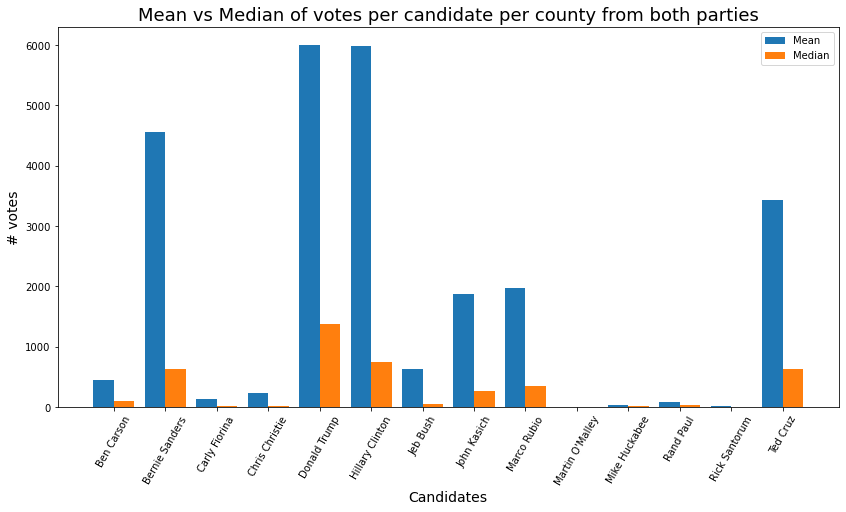

In [101]:
plt.figure(figsize=(14,7))

x_axis = np.arange(len(votes_stats_primaries['candidate']))

plt.bar(x_axis -0.2, votes_stats_primaries['mean'], width=0.4, label = 'Mean')
plt.bar(x_axis +0.2, votes_stats_primaries['median'], width=0.4, label = 'Median')

plt.xticks(x_axis, votes_stats_primaries['candidate'], rotation=60)
plt.title("Mean vs Median of votes per candidate per county from both parties",
         fontsize=18)
plt.xlabel("Candidates", fontsize=14)
plt.ylabel("# votes", fontsize=14)

plt.legend()
plt.show()

In [102]:
kurtosis=(df_candidates[['candidate','votes']].groupby('candidate')
          .apply(lambda x: x.kurt())
          .rename(columns={'votes':'kurtosis'}))
          
skewness=(df_candidates[['candidate','votes']].groupby('candidate')
          .apply(lambda x: x.skew())
          .rename(columns={'votes':'skewness'}))

votes_skew_kurt=pd.merge(kurtosis, skewness, on=['candidate'])['Ben Carson':]
votes_skew_kurt

kurtosis   skewness
candidate                             
Ben Carson       31.877807   4.957274 
Bernie Sanders   234.701248  12.207568
Carly Fiorina    36.524970   5.779598 
Chris Christie   41.754018   6.262825 
Donald Trump     53.805776   6.111245 
Hillary Clinton  206.308551  11.427421
Jeb Bush         15.346108   3.671221 
John Kasich      107.526481  8.914286 
Marco Rubio      95.037970   7.760362 
Martin O'Malley  33.797052   5.118731 
Mike Huckabee    68.365578   7.669099 
Rand Paul        35.755238   5.436797 
Rick Santorum    22.979805   4.301040 
Ted Cruz         66.363283   6.669809

<pre>
<strong>Observaions:</strong>
1. Democrate candiates appeared in most counties compared to Republican candidates.
2. The median votes of all candidates has lesser values to its corresponding mean values which says the distributions of votes of individual candudates by counties are skewed to the right(positively skewed).
3. By looking at the figures of kutosis all the distributions are "leptokurtic" (kurtosis>3)

<pre>
<strong>County Facts:</strong>
Using the county facts selective columns(demographic columns) are considered to check the descriptive statistics.
To attain meaningful statistics of all counties, rows with over all data of country and states are eliminated.

In [103]:
demographics_col_codes=['state_abbreviation','PST045214','AGE295214','AGE775214','VET605213','SEX255214',
                        'RHI125214','RHI225214','RHI325214','RHI425214',
                        'RHI725214','INC110213','EDU635213','EDU685213']

demographic_data=county_facts[demographics_col_codes]
demographic_data=(demographic_data[demographic_data['state_abbreviation'].isnull() == False]
                  .drop(['state_abbreviation'], axis=1))

<pre>The columns names are replaced with description for better understanding the results

In [104]:
renamed_cols=list(pd.merge(pd.Series(demographics_col_codes).to_frame().rename(columns={0:'column_name'}),
                      dictionary[dictionary['column_name'].isin(demographics_col_codes[1:])],
                      on=['column_name'])['description'])
demographic_data.columns=renamed_cols
demographic_data.head(3)

Population, 2014 estimate  Persons under 18 years, percent, 2014  \
2  55395                      25.2                                    
3  200111                     22.2                                    
4  26887                      21.2                                    

   Persons 65 years and over, percent, 2014  Veterans, 2009-2013  \
2  13.8                                      5922                  
3  18.7                                      19346                 
4  16.5                                      2120                  

   Female persons, percent, 2014  White alone, percent, 2014  \
2  51.4                           77.9                         
3  51.2                           87.1                         
4  46.6                           50.2                         

   Black or African American alone, percent, 2014  \
2  18.7                                             
3  9.6                                              
4  47.6                                             

   American Indian and Alaska Native alone, percent, 2014  \
2  0.5                                                      
3  0.7                                                      
4  0.6                                                      

   Asian alone, percent, 2014  Hispanic or Latino, percent, 2014  \
2  1.1                         2.7                                 
3  0.9                         4.6                                 
4  0.5                         4.5                                 

   Median household income, 2009-2013  \
2  53682                                
3  50221                                
4  32911                                

   High school graduate or higher, percent of persons age 25+, 2009-2013  \
2  85.6                                                                    
3  89.1                                                                    
4  73.7                                                                    

   Bachelor's degree or higher, percent of persons age 25+, 2009-2013  
2  20.9                                                                
3  27.7                                                                
4  13.4

In [105]:
demographic_data.describe().T

count  \
Population, 2014 estimate                                              3143.0   
Persons under 18 years, percent, 2014                                  3143.0   
Persons 65 years and over, percent, 2014                               3143.0   
Veterans, 2009-2013                                                    3143.0   
Female persons, percent, 2014                                          3143.0   
White alone, percent, 2014                                             3143.0   
Black or African American alone, percent, 2014                         3143.0   
American Indian and Alaska Native alone, percent, 2014                 3143.0   
Asian alone, percent, 2014                                             3143.0   
Hispanic or Latino, percent, 2014                                      3143.0   
Median household income, 2009-2013                                     3143.0   
High school graduate or higher, percent of persons age 25+, 2009-2013  3143.0   
Bachelor's degree or higher, percent of persons age 25+, 2009-2013     3143.0   

                                                                                mean  \
Population, 2014 estimate                                              101449.906459   
Persons under 18 years, percent, 2014                                  22.539325       
Persons 65 years and over, percent, 2014                               17.570379       
Veterans, 2009-2013                                                    6765.440344     
Female persons, percent, 2014                                          49.901782       
White alone, percent, 2014                                             85.051384       
Black or African American alone, percent, 2014                         9.226440        
American Indian and Alaska Native alone, percent, 2014                 2.249061        
Asian alone, percent, 2014                                             1.402036        
Hispanic or Latino, percent, 2014                                      9.003373        
Median household income, 2009-2013                                     45937.120904    
High school graduate or higher, percent of persons age 25+, 2009-2013  84.553548       
Bachelor's degree or higher, percent of persons age 25+, 2009-2013     19.762329       

                                                                                 std  \
Population, 2014 estimate                                              326127.277291   
Persons under 18 years, percent, 2014                                  3.436701        
Persons 65 years and over, percent, 2014                               4.450029        
Veterans, 2009-2013                                                    16275.512014    
Female persons, percent, 2014                                          2.440961        
White alone, percent, 2014                                             16.323134       
Black or African American alone, percent, 2014                         14.432632       
American Indian and Alaska Native alone, percent, 2014                 7.598386        
Asian alone, percent, 2014                                             2.733679        
Hispanic or Latino, percent, 2014                                      13.478862       
Median household income, 2009-2013                                     11921.596797    
High school graduate or higher, percent of persons age 25+, 2009-2013  6.911545        
Bachelor's degree or higher, percent of persons age 25+, 2009-2013     8.827307        

                                                                           min  \
Population, 2014 estimate                                              0.0       
Persons under 18 years, percent, 2014                                  0.0       
Persons 65 years and over, percent, 2014                               0.0       
Veterans, 2009-2013                                                    2.0       
Female persons, percent, 2014                                

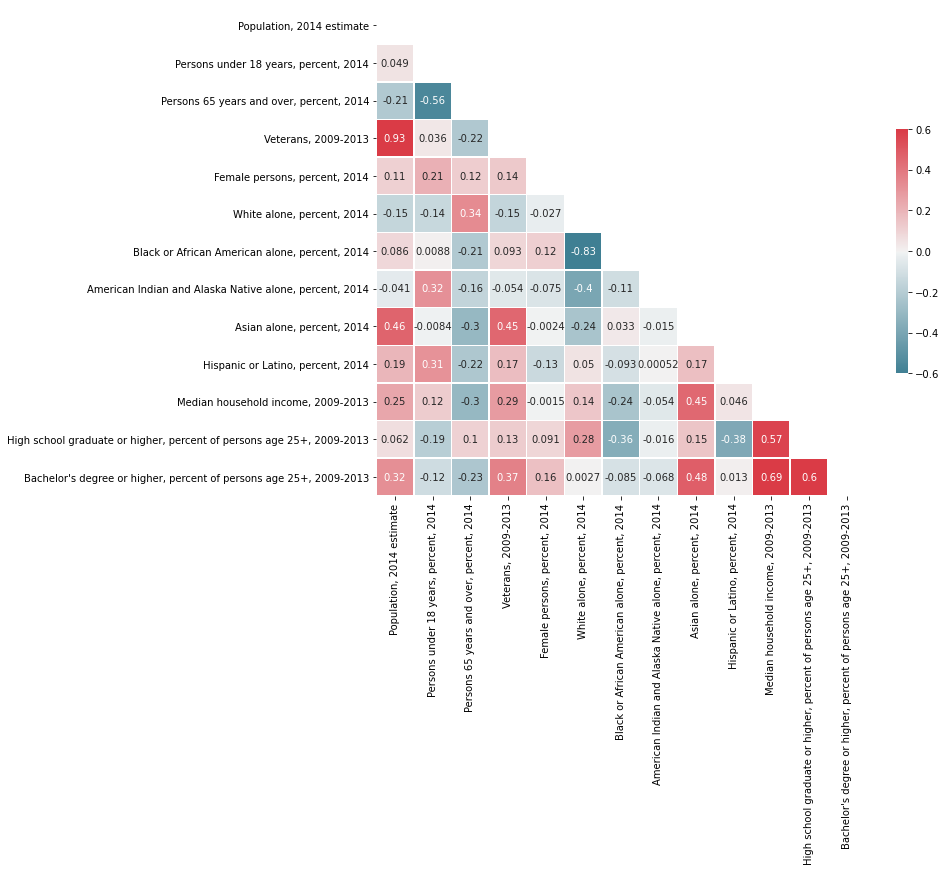

In [106]:
corr_heatmap(demographic_data, 0.6)

<pre>
1. Looking at the correlation between race/ethinic groups the percentage of white ethinic group is negatively correlated
   with Black or African American, American Indian and Asian groups. Especially Black or African American group.
2. It is note worthy that the correlation of median with Asian ethicnic group is positive and the same ethinic group is
   positvely correlated with percentage of people having Bachelor degree.
3. It is obvious that median house hold income is positvely correlated with percentage of population of people with Bachelor degree in each counties. 

-----------------------

# <center>3. Data Manupulation

## 3.1 Data seperation by parties
<pre>
Overall the data is clean. Mostly data manupulation tasks are done to acquire new datasets to examine.

Two dataframes are created for each democratic party. Dataframes will have candidates who won and their stats.
For further analysis demographical information from county facts dataset with required columns eg. race and ethnicty were considered.
</pre>

In [107]:
republican_primaries=primaries[primaries['party'] == 'Republican']
democrat_primaries=primaries[primaries['party'] == 'Democrat']

In [108]:
def max_votes_candidate(df):
    '''
    This agrregate function helps to find candidates with highest votes
    '''
    max_votes_idx = df['votes'].idxmax()
    max_fraction_votes_idx = df['fraction_votes'].idxmax()
    return pd.Series({'votes_fraction': df.loc[max_fraction_votes_idx, 'fraction_votes'],
                      'votes': df.loc[max_votes_idx, 'votes'],
                      'winner': df.loc[max_votes_idx, 'candidate']})

<pre>
By using the above function the winner has been nominated in each group of state and county by its index with maximum 
votes. These summary tables will be used to for data exploration with in the parties.
</pre>

In [109]:
republican_votes = republican_primaries.groupby(['state_abbreviation', 
                                                 'county']).apply(max_votes_candidate).reset_index()
republican_votes.head()

state_abbreviation                   county  votes_fraction  votes  \
0  AK                 State House District 1   0.392           151     
1  AK                 State House District 10  0.436           358     
2  AK                 State House District 11  0.428           455     
3  AK                 State House District 12  0.389           410     
4  AK                 State House District 13  0.401           216     

         winner  
0  Ted Cruz      
1  Donald Trump  
2  Ted Cruz      
3  Ted Cruz      
4  Ted Cruz

In [110]:
democrat_votes = democrat_primaries.groupby(['state_abbreviation', 
                                                 'county']).apply(max_votes_candidate).reset_index()
democrat_votes.head()

state_abbreviation                   county  votes_fraction  votes  \
0  AK                 State House District 1   0.750           9       
1  AK                 State House District 10  0.800           8       
2  AK                 State House District 11  0.818           9       
3  AK                 State House District 12  1.000           10      
4  AK                 State House District 13  0.714           5       

           winner  
0  Bernie Sanders  
1  Bernie Sanders  
2  Bernie Sanders  
3  Bernie Sanders  
4  Bernie Sanders

## 3.2 Extraction of relevant demographics for analysis

<pre>
When considering the factors influencing voting decisions, it is essential to consider a range of factors that shape voter behavior. These factors can be broadly categorized into individual-level factors, such as demographics and personal characteristics, and contextual or situational factors, including political, social, and economic contexts. At the individual level, demographic characteristics such as age, gender, education, income, and race/ethnicity have been found to influence voting decisions.
For instance, older individuals tend to have higher voter turnout rates, while younger voters are often more politically engaged and inclined towards progressive policies. Educational attainment has been linked to increased political participation and liberal policy preferences.

<pre>
New dataframe is framed with factors that influence voting decisions. Such as age, gender, education, income, and race/
ethnicity.

In [111]:
demographics=county_facts[['area_name','state_abbreviation','PST045214','AGE295214','AGE775214',
                           'VET605213','SEX255214','RHI125214','RHI225214','RHI325214','RHI425214',
                           'RHI725214','INC110213','EDU635213','EDU685213']]

<pre>
In the following steps overall population of voters is synthesised and columns are renamed to description.

In [112]:
with warnings.catch_warnings():
    '''
    In this statement warning are being suppressed/ignored
    '''
    warnings.simplefilter("ignore")
    warning_fxn()
    demographics['voters_population']=round(((100-demographics['AGE295214'])/100)
                                             *demographics['PST045214'],0)
    demographics['Age18to65']=round(100-(demographics['AGE295214']+demographics['AGE775214']),2)
    demographics=demographics.drop(['AGE295214'], axis=1)

In [113]:
demographics=(demographics
              .rename(columns={'area_name':'county',
                                          'PST045214':'Population_2014',
                                          'AGE775214':'Age>65(%)','VET605213':'veterans',
                                          'RHI125214':'White alone(%)',
                                          'RHI225214':'Black or African American alone(%)',
                                          'RHI325214':'American Indian and Alaska Native alone(%)',
                                          'RHI425214':'Asian alone(%)',
                                          'SEX255214':'Female persons(%)',
                                          'RHI725214':'Hispanic or Latino(%)',
                                          'INC110213':'Median household income',
                                          'EDU635213':'High school graduate or more(age 25+, %)',
                                          'EDU685213': 'Bachelor degree or more(age 25+, %)'}))

demographics['county']=demographics['county'].str.replace(" County", "")

demographics.head()

county state_abbreviation  Population_2014  Age>65(%)  veterans  \
0  United States  NaN                318857056        14.5       21263779   
1  Alabama        NaN                4849377          15.3       388865     
2  Autauga        AL                 55395            13.8       5922       
3  Baldwin        AL                 200111           18.7       19346      
4  Barbour        AL                 26887            16.5       2120       

   Female persons(%)  White alone(%)  Black or African American alone(%)  \
0  50.8               77.4            13.2                                 
1  51.5               69.7            26.7                                 
2  51.4               77.9            18.7                                 
3  51.2               87.1            9.6                                  
4  46.6               50.2            47.6                                 

   American Indian and Alaska Native alone(%)  Asian alone(%)  \
0  1.2                                         5.4              
1  0.7                                         1.3              
2  0.5                                         1.1              
3  0.7                                         0.9              
4  0.6                                         0.5              

   Hispanic or Latino(%)  Median household income  \
0  17.4                   53046                     
1  4.1                    43253                     
2  2.7                    53682                     
3  4.6                    50221                     
4  4.5                    32911                     

   High school graduate or more(age 25+, %)  \
0  86.0                                       
1  83.1                                       
2  85.6                                       
3  89.1                                       
4  73.7                                       

   Bachelor degree or more(age 25+, %)  voters_population  Age18to65  
0  28.8                                 245201076.0        62.4       
1  22.6                                 3743719.0          61.9       
2  20.9                                 41435.0            61.0       
3  27.7                                 155686.0           59.1       
4  13.4                                 21187.0            62.3

## 3.3 Comprihensive data by each party

<pre>
The resultant dataframe of "demographics" is merged with party wise voting results by counties to carry out further 
analysis.

From the Rebulican results 'Ben Carson' results are not being conisdered due to low winning figures.

In [114]:
republican_results=pd.merge(republican_votes, 
                            demographics, on=["state_abbreviation", "county"])

republican_results = republican_results[republican_results.winner != 'Ben Carson']
republican_results.head()

state_abbreviation   county  votes_fraction  votes        winner  \
0  AL                 Autauga  0.445           5387   Donald Trump   
1  AL                 Baldwin  0.469           23618  Donald Trump   
2  AL                 Barbour  0.501           1710   Donald Trump   
3  AL                 Bibb     0.494           1959   Donald Trump   
4  AL                 Blount   0.487           7390   Donald Trump   

   Population_2014  Age>65(%)  veterans  Female persons(%)  White alone(%)  \
0  55395            13.8       5922      51.4               77.9             
1  200111           18.7       19346     51.2               87.1             
2  26887            16.5       2120      46.6               50.2             
3  22506            14.8       1327      45.9               76.3             
4  57719            17.0       4540      50.5               96.0             

   Black or African American alone(%)  \
0  18.7                                 
1  9.6                                  
2  47.6                                 
3  22.1                                 
4  1.8                                  

   American Indian and Alaska Native alone(%)  Asian alone(%)  \
0  0.5                                         1.1              
1  0.7                                         0.9              
2  0.6                                         0.5              
3  0.4                                         0.2              
4  0.6                                         0.3              

   Hispanic or Latino(%)  Median household income  \
0  2.7                    53682                     
1  4.6                    50221                     
2  4.5                    32911                     
3  2.1                    36447                     
4  8.7                    44145                     

   High school graduate or more(age 25+, %)  \
0  85.6                                       
1  89.1                                       
2  73.7                                       
3  77.5                                       
4  77.0                                       

   Bachelor degree or more(age 25+, %)  voters_population  Age18to65  
0  20.9                                 41435.0            61.0       
1  27.7                                 155686.0           59.1       
2  13.4                                 21187.0            62.3       
3  12.1                                 17780.0            64.2       
4  12.1                                 44097.0            59.4

In [115]:
democrat_results=pd.merge(democrat_votes, demographics, on=["state_abbreviation", "county"])
democrat_results.head()

state_abbreviation   county  votes_fraction  votes           winner  \
0  AL                 Autauga  0.800           2387   Hillary Clinton   
1  AL                 Baldwin  0.647           5290   Hillary Clinton   
2  AL                 Barbour  0.906           2567   Hillary Clinton   
3  AL                 Bibb     0.755           942    Hillary Clinton   
4  AL                 Blount   0.551           564    Hillary Clinton   

   Population_2014  Age>65(%)  veterans  Female persons(%)  White alone(%)  \
0  55395            13.8       5922      51.4               77.9             
1  200111           18.7       19346     51.2               87.1             
2  26887            16.5       2120      46.6               50.2             
3  22506            14.8       1327      45.9               76.3             
4  57719            17.0       4540      50.5               96.0             

   Black or African American alone(%)  \
0  18.7                                 
1  9.6                                  
2  47.6                                 
3  22.1                                 
4  1.8                                  

   American Indian and Alaska Native alone(%)  Asian alone(%)  \
0  0.5                                         1.1              
1  0.7                                         0.9              
2  0.6                                         0.5              
3  0.4                                         0.2              
4  0.6                                         0.3              

   Hispanic or Latino(%)  Median household income  \
0  2.7                    53682                     
1  4.6                    50221                     
2  4.5                    32911                     
3  2.1                    36447                     
4  8.7                    44145                     

   High school graduate or more(age 25+, %)  \
0  85.6                                       
1  89.1                                       
2  73.7                                       
3  77.5                                       
4  77.0                                       

   Bachelor degree or more(age 25+, %)  voters_population  Age18to65  
0  20.9                                 41435.0            61.0       
1  27.7                                 155686.0           59.1       
2  13.4                                 21187.0            62.3       
3  12.1                                 17780.0            64.2       
4  12.1                                 44097.0            59.4

--------------------------

# 4. Exploratory Data Analysis

## 4.1 The popular Republican

### 4.1.1 Who wons how many? 

<pre>
From the histogram it is clear that Donald Trump swept the Republican primaries winning almost 4 times the number of counties which Ted Cruz won.
</pre>

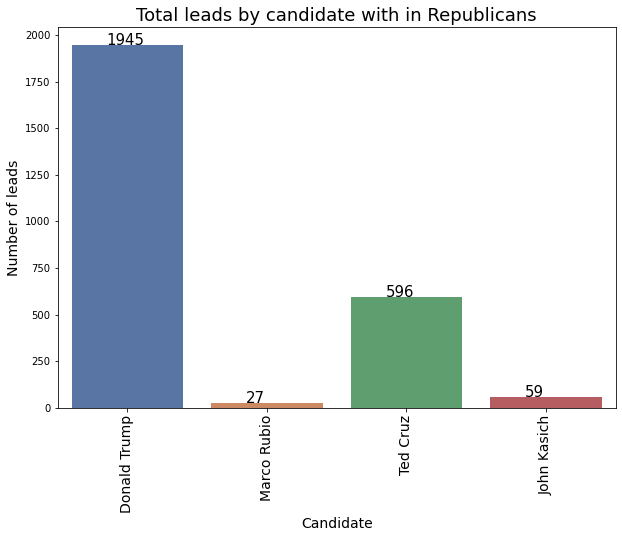

In [116]:
fig, ax1 = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax1,x='winner', data=republican_results,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90,fontsize=14)

for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.08),fontsize=15)
    
plt.title('Total leads by candidate with in Republicans', fontsize=18)
plt.xlabel("Candidate",fontsize=14)
plt.ylabel("Number of leads", fontsize=14)
plt.show()

<pre>Inspite of the popularity among Republicans, it is igored if there are any pro Trump counties/states. Let us have a look if this is the case.

In [117]:
Trumps_results=republican_results[republican_results['winner']=='Donald Trump']
Trumps_results.head()

state_abbreviation   county  votes_fraction  votes        winner  \
0  AL                 Autauga  0.445           5387   Donald Trump   
1  AL                 Baldwin  0.469           23618  Donald Trump   
2  AL                 Barbour  0.501           1710   Donald Trump   
3  AL                 Bibb     0.494           1959   Donald Trump   
4  AL                 Blount   0.487           7390   Donald Trump   

   Population_2014  Age>65(%)  veterans  Female persons(%)  White alone(%)  \
0  55395            13.8       5922      51.4               77.9             
1  200111           18.7       19346     51.2               87.1             
2  26887            16.5       2120      46.6               50.2             
3  22506            14.8       1327      45.9               76.3             
4  57719            17.0       4540      50.5               96.0             

   Black or African American alone(%)  \
0  18.7                                 
1  9.6                                  
2  47.6                                 
3  22.1                                 
4  1.8                                  

   American Indian and Alaska Native alone(%)  Asian alone(%)  \
0  0.5                                         1.1              
1  0.7                                         0.9              
2  0.6                                         0.5              
3  0.4                                         0.2              
4  0.6                                         0.3              

   Hispanic or Latino(%)  Median household income  \
0  2.7                    53682                     
1  4.6                    50221                     
2  4.5                    32911                     
3  2.1                    36447                     
4  8.7                    44145                     

   High school graduate or more(age 25+, %)  \
0  85.6                                       
1  89.1                                       
2  73.7                                       
3  77.5                                       
4  77.0                                       

   Bachelor degree or more(age 25+, %)  voters_population  Age18to65  
0  20.9                                 41435.0            61.0       
1  27.7                                 155686.0           59.1       
2  13.4                                 21187.0            62.3       
3  12.1                                 17780.0            64.2       
4  12.1                                 44097.0            59.4

In [118]:
Trumps_results=Trumps_results.groupby(['state_abbreviation'])['votes','voters_population'].sum()
Trumps_results=(Trumps_results
                .assign(Trumps_votes_share=(z['votes']/z['voters_population'])*100)
                .sort_values(['voters_population'], ascending=False))
Trumps_results

<ipython-input-118-598845cc420e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Trumps_results=Trumps_results.groupby(['state_abbreviation'])['votes','voters_population'].sum()


votes  voters_population  Trumps_votes_share
state_abbreviation                                                
CA                  1174829  29648381.0         3.962540          
FL                  1037065  13725523.0         7.555741          
NY                  475675   11654482.0         4.081477          
PA                  892702   10086514.0         8.850451          
NJ                  356697   6925225.0          5.150692          
MI                  407653   6105370.0          6.676958          
GA                  431120   5637251.0          7.647699          
WA                  403003   5458068.0          7.383620          
AZ                  248415   5080152.0          4.889913          
TN                  321318   4907305.0          6.547749          
NC                  322096   4790207.0          6.724052          
IL                  337441   4581622.0          7.365099          
IN                  537371   4529648.0          11.863416         
MD                  232673   4135321.0          5.626480          
AL                  371735   3742115.0          9.933821          
SC                  216259   3130200.0          6.908792          
OR                  240804   3112003.0          7.737910          
MA                  16110    2780190.0          0.579457          
CT                  5204     2688352.0          0.193576          
NV                  33849    2133683.0          1.586412          
VA                  162865   2132260.0          7.638140          
MS                  167823   1958344.0          8.569638          
KY                  55111    1914883.0          2.878035          
MO                  195686   1852277.0          10.564619         
OH                  159114   1554966.0          10.232635         
WV                  156245   1470033.0          10.628673         
NM                  68490    1422806.0          4.813727          
NE                  121287   1414870.0          8.572307          
WI                  133569   1212308.0          11.017745         
HI                  5677     1111447.0          0.510776          
NH                  100406   1059786.0          9.474177          
AR                  67644    1050700.0          6.437994          
MT                  114056   798345.0           14.286555         
DE                  42472    731192.0           5.808597          
IA                  14460    682696.0           2.118073          
SD                  44818    633906.0           7.070133          
RI                  2382     605193.0           0.393593          
VT                  1563     303380.0           0.515195          
TX                  4892     217457.0           2.249640          
OK                  8196     216272.0           3.789672          
ID                  6279     83082.0            7.557594

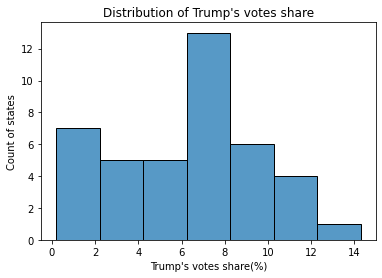

In [119]:
sns.histplot(data=z, x=z['Trumps_votes_share'])
plt.title("Distribution of Trump's votes share")
plt.xlabel("Trump's votes share(%)")
plt.ylabel("Count of states")
plt.show()

<pre>Lookng at the figures of percentages of Trump's votes there are no certain evidence to conclude that there are pro Trump state. However there are few states such as Florida, Pensylvania, Georgia,Washington and Illinois where percetage is decent for one cadidate from one party. 

### 4.1.2  Republicans Performance by Income and Education

<pre>
By visualizing the candidates performance by Income and Education, we can observe that Donald Trump and Ted Cruz seem to have won in counties with lowe percent of college educated persons earning lower medium income while Marco Rubio has outperformed all candidates in highly educated counties.
</pre>

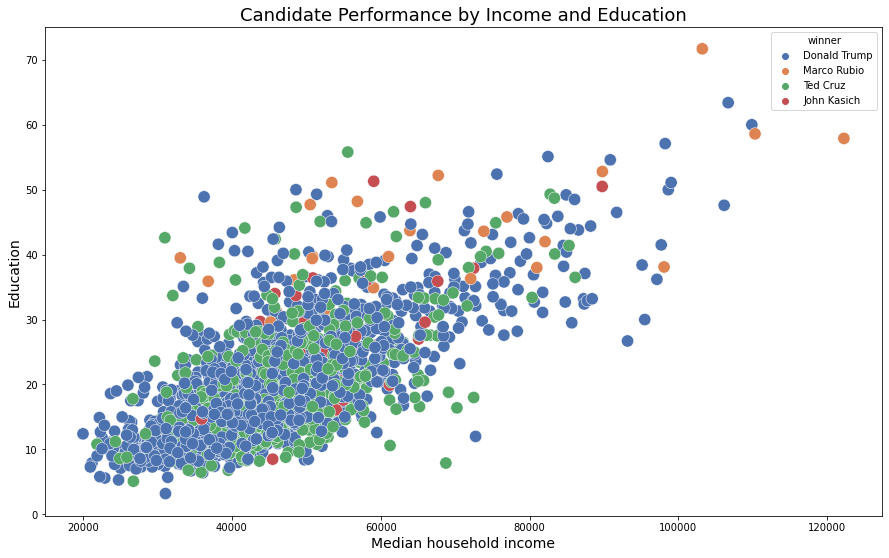

In [120]:
plt.figure(figsize=(15,9))
ax=sns.scatterplot(data=republican_results, x="Median household income", 
                y="Bachelor degree or more(age 25+, %)", hue="winner",palette="deep")
ax.collections[0].set_sizes([150])   

plt.title('Candidate Performance by Income and Education', fontsize=18)
plt.xlabel("Median household income",fontsize=14)
plt.ylabel("Education", fontsize=14)
plt.show()

### 4.1.3 Republicans performance by variuos demographics

<pre>
From these plots, it appears that Marco Rubio generally wins counties with a higher percentage of the black population compared to other candidates. However, the overlapping box plots suggest that this relationship may not be statistically significant. Similarly, Ted Cruz seems to have a tendency to win in counties with a larger Hispanic/Latino population, but again, the box plots do not provide clear evidence of statistical significance. Finally, Donald Trump appears to be more successful in counties with an older population, particularly when compared to those won by Marco Rubio. Yet, to determine if there's statistically significant evidence that he predominantly wins in older counties, a formal statistical test is required.
</pre>

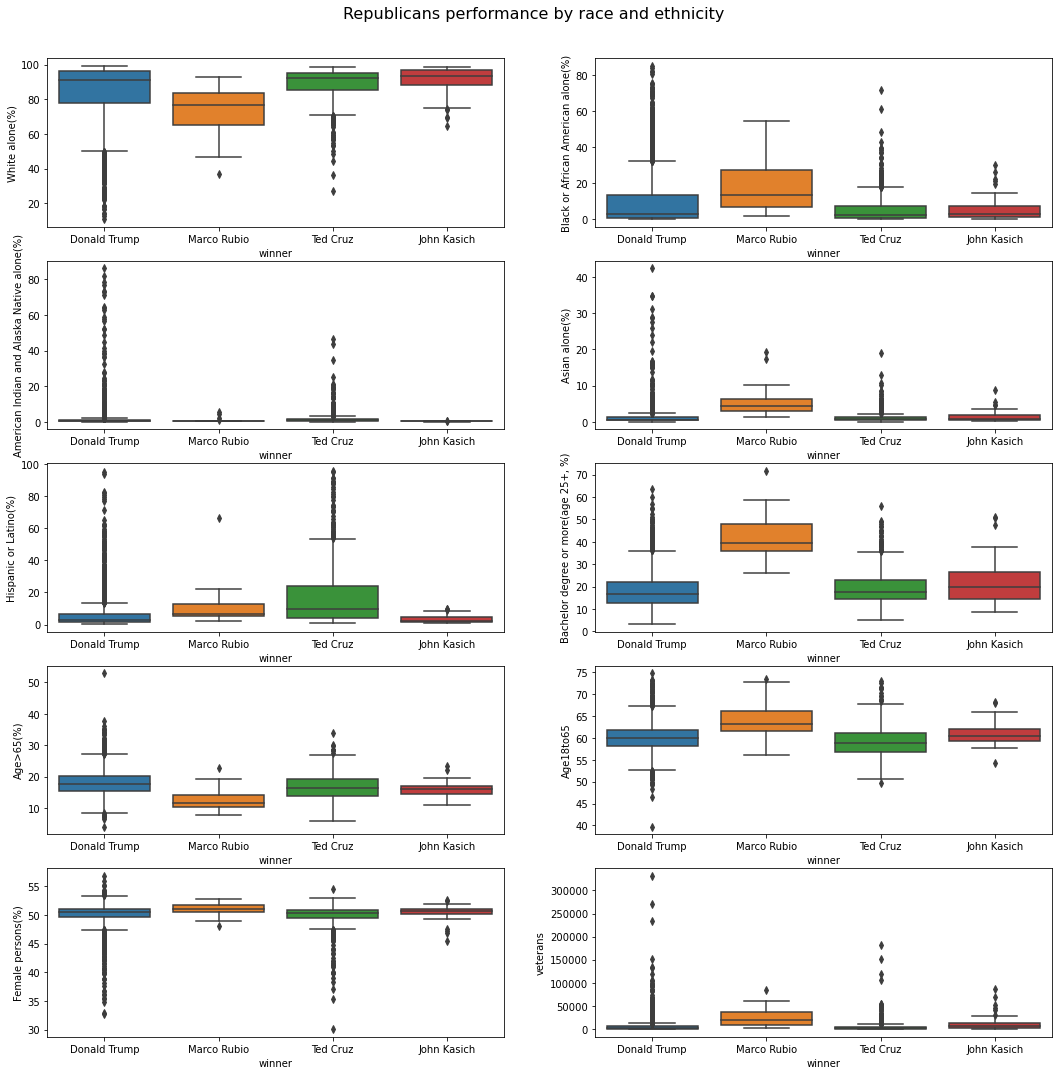

In [121]:
fig, axes = plt.subplots(5, 2, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], data=republican_results, x='winner', y='White alone(%)')
sns.boxplot(ax=axes[0, 1], data=republican_results, x='winner', y='Black or African American alone(%)')
sns.boxplot(ax=axes[1, 0], data=republican_results, x='winner', y='American Indian and Alaska Native alone(%)')
sns.boxplot(ax=axes[1, 1], data=republican_results, x='winner', y='Asian alone(%)')
sns.boxplot(ax=axes[2, 0], data=republican_results, x='winner', y='Hispanic or Latino(%)')
sns.boxplot(ax=axes[2, 1], data=republican_results, x='winner', y='Bachelor degree or more(age 25+, %)')
sns.boxplot(ax=axes[3, 0], data=republican_results, x='winner', y='Age>65(%)')
sns.boxplot(ax=axes[3, 1], data=republican_results, x='winner', y='Age18to65')
sns.boxplot(ax=axes[4, 0], data=republican_results, x='winner', y='Female persons(%)')
sns.boxplot(ax=axes[4, 1], data=republican_results, x='winner', y='veterans')

fig.suptitle("Republicans performance by race and ethnicity",
             x=0.5,y=0.92, fontsize=16)
plt.show()


## 4.3 The popular Democrat

<pre>
The Democratic primaries were however a much closer affair with Bernie Sanders edging out Hillary Clinton by ~400 counties, but Clinton winning the popular vote by a huge margin. 
</pre>

### 4.3.1 Close race between Decomcrat candidates

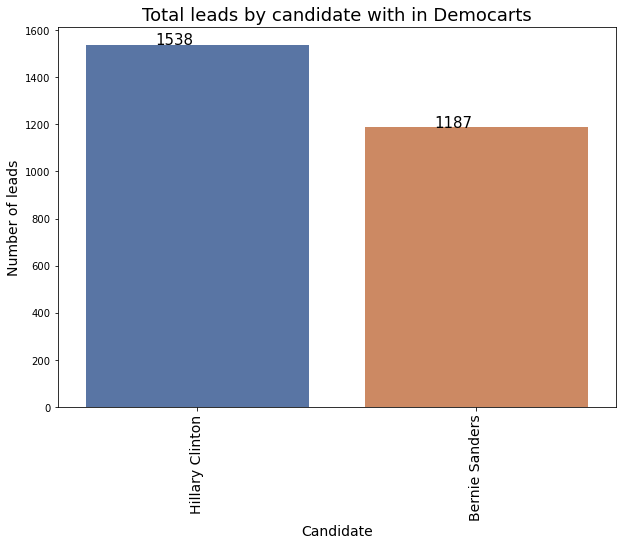

In [122]:
fig, ax1 = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax1,x='winner', data=democrat_results,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90,fontsize=14)

for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.08),fontsize=15)
    
plt.title('Total leads by candidate with in Democarts', fontsize=18)
plt.xlabel("Candidate",fontsize=14)
plt.ylabel("Number of leads", fontsize=14)
plt.show()

### 4.2.2  Democrats Performance by Income and Education

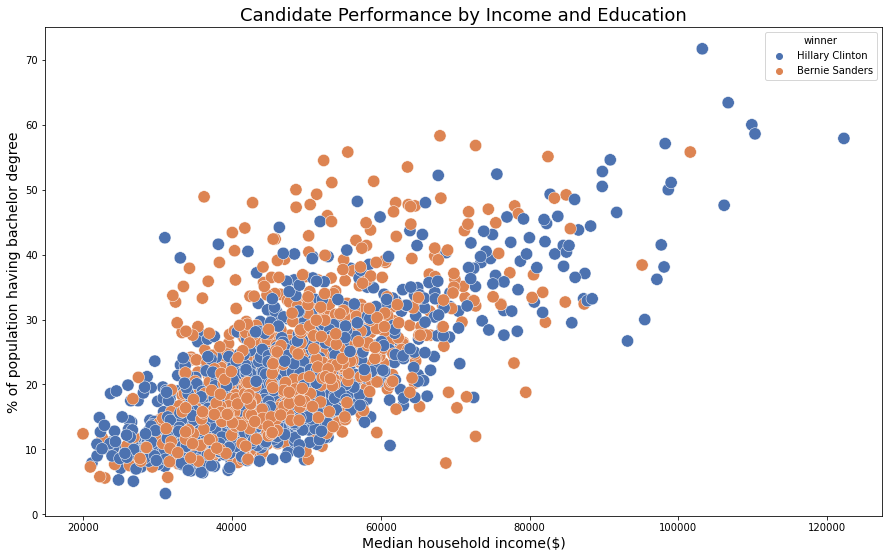

In [123]:
plt.figure(figsize=(15,9))
ax=sns.scatterplot(data=democrat_results, x="Median household income", 
                y="Bachelor degree or more(age 25+, %)", hue="winner",palette="deep")
ax.collections[0].set_sizes([150])   

plt.title('Candidate Performance by Income and Education', fontsize=18)
plt.xlabel("Median household income($)",fontsize=14)
plt.ylabel("% of population having bachelor degree", fontsize=14)
plt.show()

### 4.2.3 Democrats performance by variuos demographics

<pre>
A big observation is that Hillary Clinton predominantly wins in counties with a significantly higher black population compared to those won by Bernie Sanders. This trend is somewhat mirrored in counties with larger Hispanic populations, where Clinton also tends to prevail, albeit to a lesser extent than with the black demographic. Conversely, Bernie Sanders is more likely to secure victories in counties where the white population is relatively higher than in those won by Hillary Clinton.
</pre>

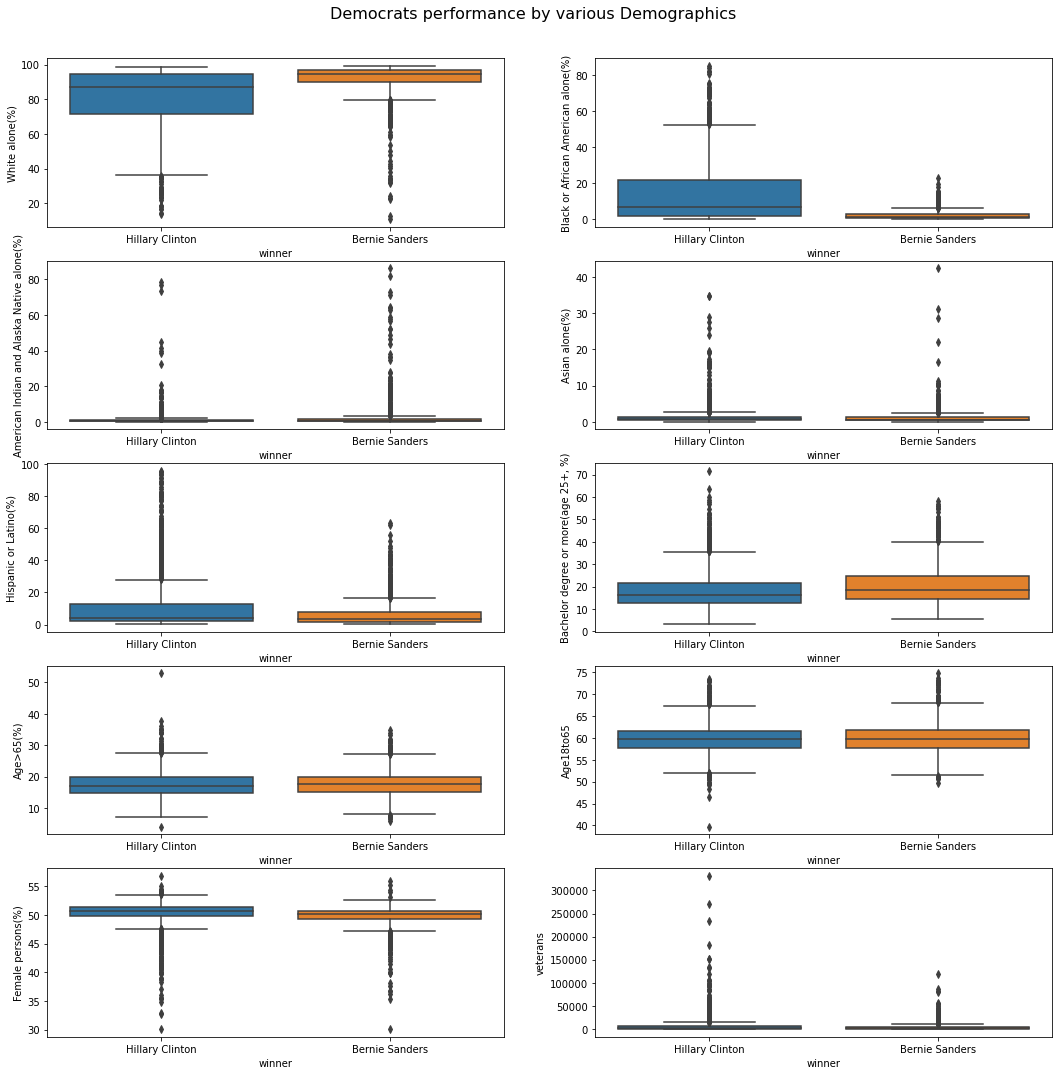

In [124]:
fig, axes = plt.subplots(5, 2, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], data=democrat_results, x='winner', y='White alone(%)')
sns.boxplot(ax=axes[0, 1], data=democrat_results, x='winner', y='Black or African American alone(%)')
sns.boxplot(ax=axes[1, 0], data=democrat_results, x='winner', y='American Indian and Alaska Native alone(%)')
sns.boxplot(ax=axes[1, 1], data=democrat_results, x='winner', y='Asian alone(%)')
sns.boxplot(ax=axes[2, 0], data=democrat_results, x='winner', y='Hispanic or Latino(%)')
sns.boxplot(ax=axes[2, 1], data=democrat_results, x='winner', y='Bachelor degree or more(age 25+, %)')
sns.boxplot(ax=axes[3, 0], data=democrat_results, x='winner', y='Age>65(%)')
sns.boxplot(ax=axes[3, 1], data=democrat_results, x='winner', y='Age18to65')
sns.boxplot(ax=axes[4, 0], data=democrat_results, x='winner', y='Female persons(%)')
sns.boxplot(ax=axes[4, 1], data=democrat_results, x='winner', y='veterans')

fig.suptitle("Democrats performance by various Demographics",
             x=0.5,y=0.92, fontsize=16)

plt.show()


# <center>5. Comparision between both parties

## 5.1 Overall results

<pre>
The individual results of both parties are combined to compare the features' results. As it was discussed that 
demographics are prime factors in decision of voting.
Considering the demographical columns, results from both parties are combined to have concrete results for the 
comparision. The granularity of the results are by counties.

In [125]:
republican_results.head(2)

state_abbreviation   county  votes_fraction  votes        winner  \
0  AL                 Autauga  0.445           5387   Donald Trump   
1  AL                 Baldwin  0.469           23618  Donald Trump   

   Population_2014  Age>65(%)  veterans  Female persons(%)  White alone(%)  \
0  55395            13.8       5922      51.4               77.9             
1  200111           18.7       19346     51.2               87.1             

   Black or African American alone(%)  \
0  18.7                                 
1  9.6                                  

   American Indian and Alaska Native alone(%)  Asian alone(%)  \
0  0.5                                         1.1              
1  0.7                                         0.9              

   Hispanic or Latino(%)  Median household income  \
0  2.7                    53682                     
1  4.6                    50221                     

   High school graduate or more(age 25+, %)  \
0  85.6                                       
1  89.1                                       

   Bachelor degree or more(age 25+, %)  voters_population  Age18to65  
0  20.9                                 41435.0            61.0       
1  27.7                                 155686.0           59.1

In [126]:
democrat_results.head(2)

state_abbreviation   county  votes_fraction  votes           winner  \
0  AL                 Autauga  0.800           2387   Hillary Clinton   
1  AL                 Baldwin  0.647           5290   Hillary Clinton   

   Population_2014  Age>65(%)  veterans  Female persons(%)  White alone(%)  \
0  55395            13.8       5922      51.4               77.9             
1  200111           18.7       19346     51.2               87.1             

   Black or African American alone(%)  \
0  18.7                                 
1  9.6                                  

   American Indian and Alaska Native alone(%)  Asian alone(%)  \
0  0.5                                         1.1              
1  0.7                                         0.9              

   Hispanic or Latino(%)  Median household income  \
0  2.7                    53682                     
1  4.6                    50221                     

   High school graduate or more(age 25+, %)  \
0  85.6                                       
1  89.1                                       

   Bachelor degree or more(age 25+, %)  voters_population  Age18to65  
0  20.9                                 41435.0            61.0       
1  27.7                                 155686.0           59.1

In [127]:
demograph_columns=['state_abbreviation', 'county', 'votes', 'winner','Population_2014',
                   'Age>65(%)','Age18to65','veterans', 'Female persons(%)','White alone(%)',
                   'Black or African American alone(%)','American Indian and Alaska Native alone(%)',
                   'Asian alone(%)','Hispanic or Latino(%)', 'Median household income',
                   'High school graduate or more(age 25+, %)','Bachelor degree or more(age 25+, %)',
                   'voters_population']


overall_results=republican_results[demograph_columns].merge(democrat_results[demograph_columns],
    on=['state_abbreviation', 'county','Population_2014', 'Age>65(%)', 'Age18to65','veterans', 
        'Female persons(%)','White alone(%)', 'Black or African American alone(%)',
       'American Indian and Alaska Native alone(%)', 'Asian alone(%)','Hispanic or Latino(%)',
        'Median household income','High school graduate or more(age 25+, %)',
       'Bachelor degree or more(age 25+, %)','voters_population'],
    suffixes=('_repub','_demo'))

<pre>By comparing number of votes from the winners of each parties, the aggregate winner is obtained. The results are stored into new column (winner).
Moreover there is possibility of creating another column for each party(votes_repub & votes_demo) to obtain percentage of votes secured from total population from each county.

In [128]:
overall_results=(
    overall_results.assign(
    winner=(overall_results.apply(lambda a: 'Democrat' if a['votes_repub'] < a['votes_demo'] 
                                    else 'Republican', axis=1 )),
    per_votes_repub=(overall_results['votes_repub']/overall_results['Population_2014'])*100,
    per_votes_demo=(overall_results['votes_demo']/overall_results['Population_2014'])*100)
)

overall_results.head()

state_abbreviation   county  votes_repub  winner_repub  Population_2014  \
0  AL                 Autauga  5387         Donald Trump  55395             
1  AL                 Baldwin  23618        Donald Trump  200111            
2  AL                 Barbour  1710         Donald Trump  26887             
3  AL                 Bibb     1959         Donald Trump  22506             
4  AL                 Blount   7390         Donald Trump  57719             

   Age>65(%)  Age18to65  veterans  Female persons(%)  White alone(%)  ...  \
0  13.8       61.0       5922      51.4               77.9            ...   
1  18.7       59.1       19346     51.2               87.1            ...   
2  16.5       62.3       2120      46.6               50.2            ...   
3  14.8       64.2       1327      45.9               76.3            ...   
4  17.0       59.4       4540      50.5               96.0            ...   

   Hispanic or Latino(%)  Median household income  \
0  2.7                    53682                     
1  4.6                    50221                     
2  4.5                    32911                     
3  2.1                    36447                     
4  8.7                    44145                     

   High school graduate or more(age 25+, %)  \
0  85.6                                       
1  89.1                                       
2  73.7                                       
3  77.5                                       
4  77.0                                       

   Bachelor degree or more(age 25+, %)  voters_population  votes_demo  \
0  20.9                                 41435.0            2387         
1  27.7                                 155686.0           5290         
2  13.4                                 21187.0            2567         
3  12.1                                 17780.0            942          
4  12.1                                 44097.0            564          

       winner_demo      winner  per_votes_repub per_votes_demo  
0  Hillary Clinton  Republican  9.724704         4.309053       
1  Hillary Clinton  Republican  11.802450        2.643533       
2  Hillary Clinton  Democrat    6.359951         9.547365       
3  Hillary Clinton  Republican  8.704346         4.185551       
4  Hillary Clinton  Republican  12.803410        0.977148       

[5 rows x 23 columns]

<pre>Other new column is added "winner_votes_perc" to attain the percentage of votes of winner party in each county.
This is considered one of the important data in further analysis.

In [129]:
overall_results=overall_results.assign(
    winner_votes_perc=overall_results.apply(lambda a: a['per_votes_demo'] if a['votes_repub'] < a['votes_demo'] 
                                    else a['per_votes_repub'], axis=1)

)
overall_results.head()

state_abbreviation   county  votes_repub  winner_repub  Population_2014  \
0  AL                 Autauga  5387         Donald Trump  55395             
1  AL                 Baldwin  23618        Donald Trump  200111            
2  AL                 Barbour  1710         Donald Trump  26887             
3  AL                 Bibb     1959         Donald Trump  22506             
4  AL                 Blount   7390         Donald Trump  57719             

   Age>65(%)  Age18to65  veterans  Female persons(%)  White alone(%)  ...  \
0  13.8       61.0       5922      51.4               77.9            ...   
1  18.7       59.1       19346     51.2               87.1            ...   
2  16.5       62.3       2120      46.6               50.2            ...   
3  14.8       64.2       1327      45.9               76.3            ...   
4  17.0       59.4       4540      50.5               96.0            ...   

   Median household income  High school graduate or more(age 25+, %)  \
0  53682                    85.6                                       
1  50221                    89.1                                       
2  32911                    73.7                                       
3  36447                    77.5                                       
4  44145                    77.0                                       

   Bachelor degree or more(age 25+, %)  voters_population  votes_demo  \
0  20.9                                 41435.0            2387         
1  27.7                                 155686.0           5290         
2  13.4                                 21187.0            2567         
3  12.1                                 17780.0            942          
4  12.1                                 44097.0            564          

       winner_demo      winner  per_votes_repub  per_votes_demo  \
0  Hillary Clinton  Republican  9.724704         4.309053         
1  Hillary Clinton  Republican  11.802450        2.643533         
2  Hillary Clinton  Democrat    6.359951         9.547365         
3  Hillary Clinton  Republican  8.704346         4.185551         
4  Hillary Clinton  Republican  12.803410        0.977148         

  winner_votes_perc  
0  9.724704          
1  11.802450         
2  9.547365          
3  8.704346          
4  12.803410         

[5 rows x 24 columns]

In [130]:
descriptive_stats=overall_results.groupby('winner').apply(lambda x: x.describe().applymap(lambda x: f"{x:0.3f}"))

democrat_stats=descriptive_stats.loc['Democrat'].T
democrat_stats

count        mean         std  \
votes_repub                                 787.000  6078.803    14883.794    
Population_2014                             787.000  187175.470  522443.425   
Age>65(%)                                   787.000  16.436      3.719        
Age18to65                                   787.000  61.145      3.614        
veterans                                    787.000  10984.701   23849.476    
Female persons(%)                           787.000  50.280      2.294        
White alone(%)                              787.000  75.420      21.447       
Black or African American alone(%)          787.000  17.181      20.796       
American Indian and Alaska Native alone(%)  787.000  2.912       9.313        
Asian alone(%)                              787.000  2.175       4.218        
Hispanic or Latino(%)                       787.000  10.756      18.081       
Median household income                     787.000  44764.911   14194.299    
High school graduate or more(age 25+, %)    787.000  83.033      7.922        
Bachelor degree or more(age 25+, %)         787.000  21.118      10.797       
voters_population                           787.000  143983.849  400746.234   
votes_demo                                  787.000  11980.244   31654.045    
per_votes_repub                             787.000  3.615       2.115        
per_votes_demo                              787.000  7.287       4.482        
winner_votes_perc                           787.000  7.287       4.482        

                                                  min        25%        50%  \
votes_repub                                 8.000      349.500    1088.000    
Population_2014                             400.000    14096.000  34076.000   
Age>65(%)                                   4.100      13.900     16.300      
Age18to65                                   51.400     58.700     60.900      
veterans                                    30.000     1075.500   2616.000    
Female persons(%)                           32.700     49.800     50.700      
White alone(%)                              10.800     60.700     82.300      
Black or African American alone(%)          0.200      1.300      5.900       
American Indian and Alaska Native alone(%)  0.100      0.300      0.500       
Asian alone(%)                              0.000      0.400      0.700       
Hispanic or Latino(%)                       0.500      2.100      4.000       
Median household income                     21192.000  35033.000  42455.000   
High school graduate or more(age 25+, %)    45.000     77.700     84.500      
Bachelor degree or more(age 25+, %)         3.200      12.850     17.800      
voters_population                           298.000    11177.500  26765.000   
votes_demo                                  63.000     840.000    2262.000    
per_votes_repub                             0.027      1.908      3.318       
per_votes_demo                              0.056      4.835      6.609       
winner_votes_perc                           0.056      4.835      6.609       

                                                   75%           max  
votes_repub                                 4160.000    179130.000    
Population_2014                             134423.000  10116705.000  
Age>65(%)                                   18.700      30.900        
Age18to65                                   63.100      73.500        
veterans                                    9366.000    331642.000    
Female persons(%)                           51.500      55.200        
White alone(%)                              94.000      98.800        
Black or African American alone(%)          31.200      85.100        
American Indian and Alaska Native alone(%)  1.100       86.200        
Asian alone(%)                              2.000       42.400        
Hispanic or Latino(%)                       9.600       95.800        
Median household income         

In [131]:
democrat_stats=descriptive_stats.loc['Republican'].T
democrat_stats

count       mean         std  \
votes_repub                                 1840.000  4863.452   9478.125     
Population_2014                             1840.000  70881.595  188472.236   
Age>65(%)                                   1840.000  18.203     4.452        
Age18to65                                   1840.000  59.229     3.260        
veterans                                    1840.000  5472.325   12210.052    
Female persons(%)                           1840.000  49.880     2.132        
White alone(%)                              1840.000  89.483     9.788        
Black or African American alone(%)          1840.000  6.182      8.720        
American Indian and Alaska Native alone(%)  1840.000  1.505      4.460        
Asian alone(%)                              1840.000  1.011      1.408        
Hispanic or Latino(%)                       1840.000  8.546      11.695       
Median household income                     1840.000  45406.718  10444.517    
High school graduate or more(age 25+, %)    1840.000  84.434     6.387        
Bachelor degree or more(age 25+, %)         1840.000  18.369     7.141        
voters_population                           1840.000  54358.482  142840.521   
votes_demo                                  1840.000  2531.503   6886.391     
per_votes_repub                             1840.000  8.529      3.684        
per_votes_demo                              1840.000  3.256      1.936        
winner_votes_perc                           1840.000  8.529      3.684        

                                                  min        25%        50%  \
votes_repub                                 14.000     911.750    2090.000    
Population_2014                             86.000     11555.750  26107.500   
Age>65(%)                                   6.000      15.400     17.700      
Age18to65                                   39.700     57.400     59.400      
veterans                                    2.000      964.000    2147.000    
Female persons(%)                           30.100     49.500     50.300      
White alone(%)                              31.900     86.600     93.250      
Black or African American alone(%)          0.000      0.700      2.200       
American Indian and Alaska Native alone(%)  0.000      0.300      0.600       
Asian alone(%)                              0.000      0.400      0.600       
Hispanic or Latino(%)                       0.200      2.000      3.700       
Median household income                     19986.000  38550.250  43699.500   
High school graduate or more(age 25+, %)    55.200     80.400     85.600      
Bachelor degree or more(age 25+, %)         5.600      13.400     16.800      
voters_population                           60.000     9125.250   20440.500   
votes_demo                                  0.000      270.000    783.500     
per_votes_repub                             0.093      6.192      7.974       
per_votes_demo                              0.000      1.876      3.123       
winner_votes_perc                           0.093      6.192      7.974       

                                                  75%          max  
votes_repub                                 4815.250   146888.000   
Population_2014                             63265.750  4087191.000  
Age>65(%)                                   20.300     52.900       
Age18to65                                   61.100     74.800       
veterans                                    5354.750   271518.000   
Female persons(%)                           50.900     56.800       
White alone(%)                              96.300     99.300       
Black or African American alone(%)          7.600      49.900       
American Indian and Alaska Native alone(%)  1.100      64.400       
Asian alone(%)                              1.100      19.600       
Hispanic or Latino(%)                       9.300      70.600       
Median household income                     50102.750  10

<pre>Overall votes obtained by each party statewise. Number of votes will be displayed whilehovering the map. Red 
olour represents the Republicans and blue for Democrats.
Visually it shows Democrats vote share is higher than Republicans.

In [132]:
votes_by_state=overall_results.groupby('state_abbreviation')['votes_repub','votes_demo'].sum().reset_index()
fig=px.choropleth(votes_by_state,
                  locations='state_abbreviation',
                  locationmode='USA-states',
                  scope='usa',
                  color='votes_repub',
                  hover_name='state_abbreviation',
                  hover_data=['votes_repub','votes_demo'],
                  range_color=[2000000,140],
                  color_continuous_scale=["blue","red"],
                  title='State wise domination of parties')

fig.show()

<ipython-input-132-fa0619c75a29>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  votes_by_state=overall_results.groupby('state_abbreviation')['votes_repub','votes_demo'].sum().reset_index()


In [133]:
print(f"Overall votes of Republicans {overall_results['votes_repub'].sum()}\nOverall votes of Democrats {overall_results['votes_demo'].sum()}")

Overall votes of Republicans 13732770
Overall votes of Democrats 14086418


## 5.2 Analysis of Median Household Income

<pre>In the following plot results are drawn between percentage of winner's votes in a particular county with its median house hold income.
Observations:
1. There are some patterns worth to note about Democrat's votes that they have popularity in counties where median 
   income range between (~20.000$ to ~38.000$)(lower inscale).
2. There is also big cluster in Republicans where most wins were recorded with wide range of median income.

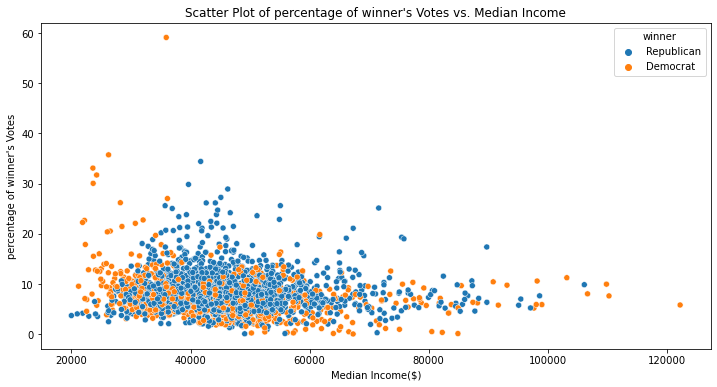

In [138]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Median household income', y='winner_votes_perc', hue='winner', data=overall_results)
plt.title("Scatter Plot of percentage of winner's Votes vs. Median Income")
plt.xlabel('Median Income($)')
plt.ylabel("percentage of winner's Votes")
plt.show()

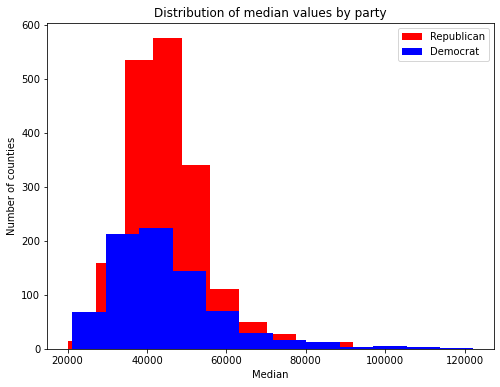

In [139]:
group_name = overall_results['winner'].unique()
colors = ['red', 'blue']

for i, group in enumerate(group_name):
    ax = overall_results[overall_results['winner']==
                        group]['Median household income'].hist(figsize=(8, 6),
                                                               bins=12,
                                                               color=colors[i])

ax.legend(group_name)

ax.set_title('Distribution of median values by party')
ax.set_xlabel('Median')
ax.set_ylabel('Number of counties')
plt.grid(b=None)
plt.show()

<pre>By looking at the figures above, it is interesting to see that lower income population's favorite is Democrats.
Are these results saying something or directing to check if ethinic factor involve in it? However by looking at negative
correlation between two major ethinic groups in US, there is a chance.

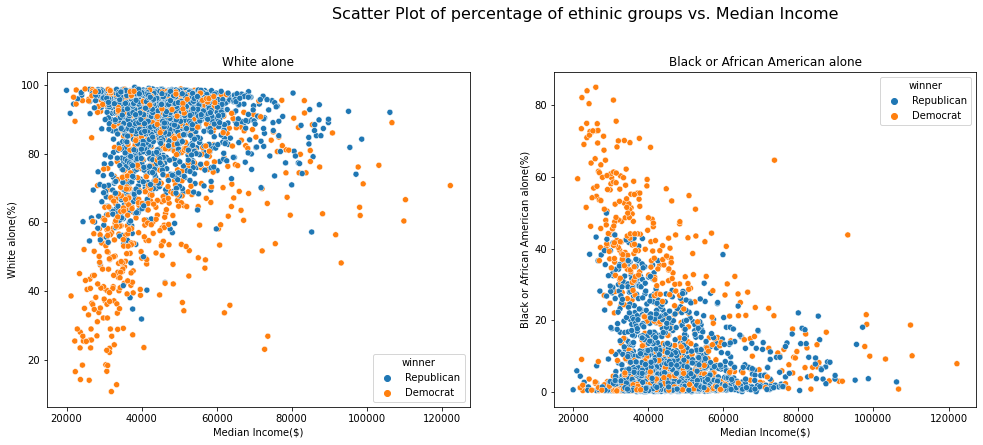

In [140]:
fig, axes=plt.subplots(1,2,figsize=(12, 6))

sns.scatterplot(ax=axes[0], x='Median household income', y='White alone(%)',
                hue='winner', data=overall_results)
axes[0].set_title("White alone")
axes[0].set_xlabel('Median Income($)')
axes[0].set_ylabel("White alone(%)")

sns.scatterplot(ax=axes[1], x='Median household income', y='Black or African American alone(%)',
                hue='winner', data=overall_results)
axes[1].set_title("Black or African American alone")
axes[1].set_xlabel('Median Income($)')
axes[1].set_ylabel("Black or African American alone(%)")

plt.subplots_adjust(top=0.9, right=1.2)
fig.suptitle('Scatter Plot of percentage of ethinic groups vs. Median Income ',
             x=0.75,y=1.05, fontsize=16)
plt.show()

<pre>Victories of counties having less white ethinic gropup population and more Black or African ethinic group population having lower scale median income is secured by Democrats. It shows that there is defenitely a involment of ethinicity and income together.

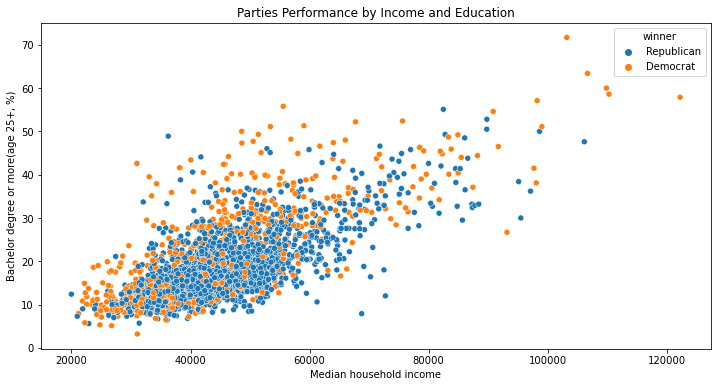

In [141]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=overall_results, x="Median household income", y="Bachelor degree or more(age 25+, %)", hue="winner")
plt.title("Parties Performance by Income and Education")
plt.show()

<pre>However Democrats are doing well among the counties having more percent of population of people having higher education with decent median income.

## 5.3 Race & Ethinic groups analysis

<pre>It is already clear that from the above chunk of analysis that Republicans have mass following among counties having
more white ethinic group population. However it is worth to check exclusively.

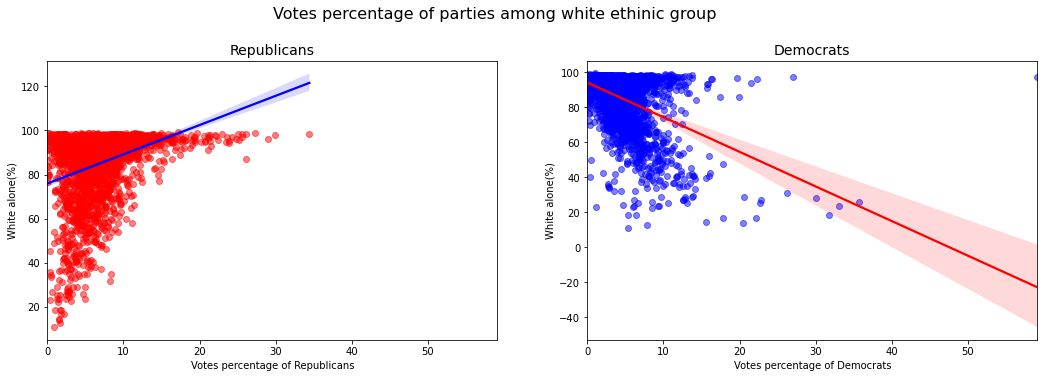

In [142]:
fig,axes=plt.subplots(1,2,sharex=True, figsize=(10,5))

sns.regplot(ax=axes[0],data=overall_results, x="per_votes_repub", y="White alone(%)",
            scatter_kws = {"color": "red", "alpha": 0.5},
            line_kws = {"color": "blue"})
axes[0].set_title('Republicans', fontsize=14)
axes[0].set_xlabel("Votes percentage of Republicans")

sns.regplot(ax=axes[1],data=overall_results, x="per_votes_demo", y="White alone(%)",
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})
axes[1].set_title('Democrats', fontsize=14)
axes[1].set_xlabel("Votes percentage of Democrats")

plt.subplots_adjust(top=0.9, right=1.5)
fig.suptitle('Votes percentage of parties among white ethinic group ',
             x=0.75,y=1.05, fontsize=16)
plt.show()

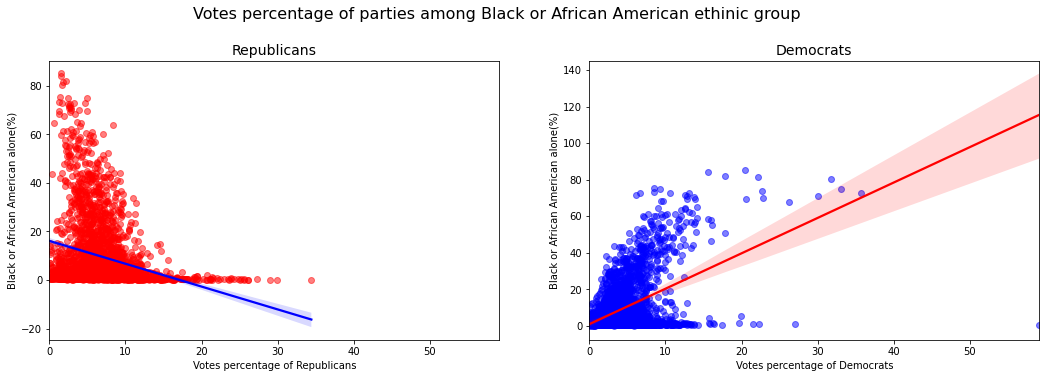

In [143]:
fig,axes=plt.subplots(1,2,sharex=True, figsize=(10,5))

sns.regplot(ax=axes[0],data=overall_results,
            x="per_votes_repub", y="Black or African American alone(%)",
            scatter_kws = {"color": "red", "alpha": 0.5},
            line_kws = {"color": "blue"})
axes[0].set_title('Republicans', fontsize=14)
axes[0].set_xlabel("Votes percentage of Republicans")

sns.regplot(ax=axes[1],data=overall_results,
            x="per_votes_demo", y="Black or African American alone(%)",
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})
axes[1].set_title('Democrats', fontsize=14)
axes[1].set_xlabel("Votes percentage of Democrats")
# axes[1].set_xticks(range(len(overall_results['Black or African American alone(%)'])))
plt.subplots_adjust(top=0.9, right=1.5)
fig.suptitle('Votes percentage of parties among Black or African American ethinic group ',
             x=0.75,y=1.05, fontsize=16)
plt.show()

<pre>From the above plots, it is clearly visible that Republicans' votes have positive relation with percentage of White ethinic group's population. Where as Democrats really need to consider better startegy to pull the attention of the group.
However 

## 5.4 By age

In [144]:
overall_results[['Age18to65','Age>65(%)','per_votes_repub','per_votes_demo','winner_votes_perc']].corr()

Age18to65  Age>65(%)  per_votes_repub  per_votes_demo  \
Age18to65          1.000000  -0.657491  -0.317815         0.189069         
Age>65(%)         -0.657491   1.000000   0.385595        -0.021277         
per_votes_repub   -0.317815   0.385595   1.000000        -0.206248         
per_votes_demo     0.189069  -0.021277  -0.206248         1.000000         
winner_votes_perc -0.208011   0.298148   0.738188         0.385791         

                   winner_votes_perc  
Age18to65         -0.208011           
Age>65(%)          0.298148           
per_votes_repub    0.738188           
per_votes_demo     0.385791           
winner_votes_perc  1.000000

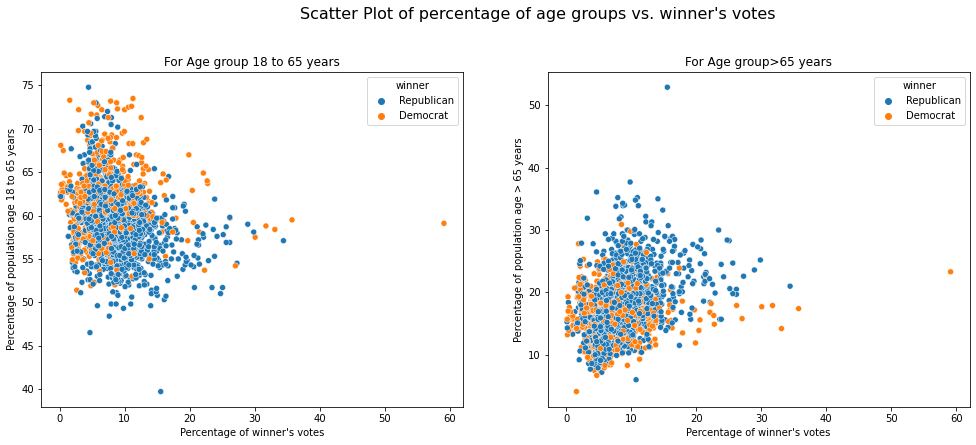

In [145]:
fig, axes=plt.subplots(1,2,figsize=(12, 6))

sns.scatterplot(ax=axes[0], x='winner_votes_perc', y='Age18to65',
                hue='winner', data=overall_results)
axes[0].set_title("For Age group 18 to 65 years")
axes[0].set_xlabel("Percentage of winner's votes")
axes[0].set_ylabel("Percentage of population age 18 to 65 years")

sns.scatterplot(ax=axes[1], x='winner_votes_perc', y='Age>65(%)',
                hue='winner', data=overall_results)
axes[1].set_title("For Age group>65 years")
axes[1].set_xlabel("Percentage of winner's votes")
axes[1].set_ylabel("Percentage of population age > 65 years")

plt.subplots_adjust(top=0.9, right=1.2)
fig.suptitle("Scatter Plot of percentage of age groups vs. winner's votes",
             x=0.7,y=1.05, fontsize=16)
plt.show()

# <center>6. Where Democrats can gain?

<pre>Here the results are filtered on other side of the coin, where Democrats are lost.
Counties have retrived where Republicans won along with all demographics.

In [146]:
democrats_possibilities=overall_results[overall_results['winner']=='Republican']
democrats_possibilities=(democrats_possibilities.assign(
    difference=democrats_possibilities['per_votes_repub']
    -democrats_possibilities['per_votes_demo']))

print("It is the lag of votes percentage where Democrats are behind Republicans. ")
democrats_possibilities[['difference']].head()

It is the lag of votes percentage where Democrats are behind Republicans. 


difference
0  5.415651  
1  9.158917  
3  4.518795  
4  11.826262 
7  3.406777

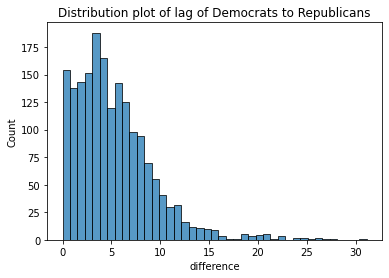

In [148]:
sns.histplot(data=democrats_possibilities, x='difference')
plt.title("Distribution plot of lag of Democrats to Republicans")
plt.show()

<pre>Lets see what descriptive stats say about the counties where Democrats lost.

In [149]:
democrats_possibilities_stats=democrats_possibilities[[
    'Age>65(%)', 'Age18to65', 'veterans','White alone(%)',
    'Black or African American alone(%)', 'Median household income',
    'High school graduate or more(age 25+, %)',
    'Bachelor degree or more(age 25+, %)',
    'difference']].describe().applymap(lambda x: f"{x:0.3f}").T
democrats_possibilities_stats

count       mean        std  \
Age>65(%)                                 1840.000  18.203     4.452       
Age18to65                                 1840.000  59.229     3.260       
veterans                                  1840.000  5472.325   12210.052   
White alone(%)                            1840.000  89.483     9.788       
Black or African American alone(%)        1840.000  6.182      8.720       
Median household income                   1840.000  45406.718  10444.517   
High school graduate or more(age 25+, %)  1840.000  84.434     6.387       
Bachelor degree or more(age 25+, %)       1840.000  18.369     7.141       
difference                                1840.000  5.272      4.034       

                                                min        25%        50%  \
Age>65(%)                                 6.000      15.400     17.700      
Age18to65                                 39.700     57.400     59.400      
veterans                                  2.000      964.000    2147.000    
White alone(%)                            31.900     86.600     93.250      
Black or African American alone(%)        0.000      0.700      2.200       
Median household income                   19986.000  38550.250  43699.500   
High school graduate or more(age 25+, %)  55.200     80.400     85.600      
Bachelor degree or more(age 25+, %)       5.600      13.400     16.800      
difference                                0.000      2.448      4.454       

                                                75%         max  
Age>65(%)                                 20.300     52.900      
Age18to65                                 61.100     74.800      
veterans                                  5354.750   271518.000  
White alone(%)                            96.300     99.300      
Black or African American alone(%)        7.600      49.900      
Median household income                   50102.750  106143.000  
High school graduate or more(age 25+, %)  89.200     99.000      
Bachelor degree or more(age 25+, %)       21.500     55.100      
difference                                7.155      31.134

In [150]:
compare_stats=(democrats_possibilities_stats
               .merge(democrat_stats,left_index=True, right_index=True)
               [['mean_x','mean_y','50%_x','50%_y', 'std_x','std_y']])
compare_stats=compare_stats.rename(columns={
    'mean_x':'Mean_lost','std_x':'std_lost',
    'mean_y':'Mean_won','std_y':'std_won',
    '50%_x':'Median_lost',
    '50%_y':'Median_win'
})
compare_stats

Mean_lost   Mean_won Median_lost  \
Age>65(%)                                 18.203     18.203     17.700       
Age18to65                                 59.229     59.229     59.400       
veterans                                  5472.325   5472.325   2147.000     
White alone(%)                            89.483     89.483     93.250       
Black or African American alone(%)        6.182      6.182      2.200        
Median household income                   45406.718  45406.718  43699.500    
High school graduate or more(age 25+, %)  84.434     84.434     85.600       
Bachelor degree or more(age 25+, %)       18.369     18.369     16.800       

                                         Median_win   std_lost    std_won  
Age>65(%)                                 17.700     4.452      4.452      
Age18to65                                 59.400     3.260      3.260      
veterans                                  2147.000   12210.052  12210.052  
White alone(%)                            93.250     9.788      9.788      
Black or African American alone(%)        2.200      8.720      8.720      
Median household income                   43699.500  10444.517  10444.517  
High school graduate or more(age 25+, %)  85.600     6.387      6.387      
Bachelor degree or more(age 25+, %)       16.800     7.141      7.141

<pre>From the above comparisions of descriptive statistics, it is observed that demographics such as age(8 to 65),
Black ethinic group, veterans, population with Bachelor degree has more median values. At the same time the differene of few other demographics such as age(>65), median income, population with higher school garduate are less comparitively. 

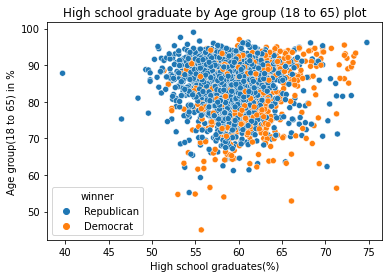

In [151]:
sns.scatterplot(data=overall_results, x="Age18to65", y="High school graduate or more(age 25+, %)", hue="winner")
plt.title("High school graduate by Age group (18 to 65) plot")
plt.xlabel("High school graduates(%)")
plt.ylabel("Age group(18 to 65) in %")
plt.show()

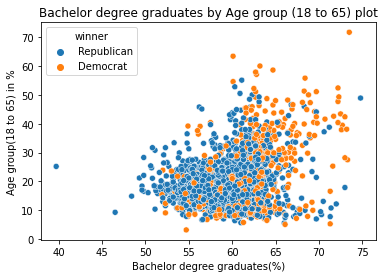

In [152]:
sns.scatterplot(data=overall_results, x="Age18to65", y="Bachelor degree or more(age 25+, %)", hue="winner")
plt.title("Bachelor degree graduates by Age group (18 to 65) plot")
plt.xlabel("Bachelor degree graduates(%)")
plt.ylabel("Age group(18 to 65) in %")
plt.show()

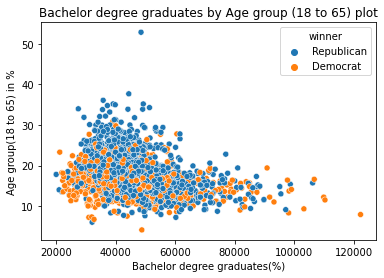

In [153]:
sns.scatterplot(data=overall_results, x="Median household income", y="Age>65(%)", hue="winner")
plt.title("Bachelor degree graduates by Age group (18 to 65) plot")
plt.xlabel("Bachelor degree graduates(%)")
plt.ylabel("Age group(18 to 65) in %")
plt.show()

In [154]:
possible_counties=overall_results.loc[(overall_results['High school graduate or more(age 25+, %)']<=85.6)
                                     & (overall_results['Median household income']<=43699.0)
                                     & (overall_results['Age>65(%)']<=17.7)
                                    ]

In [155]:
possible_counties_list=possible_counties.groupby('state_abbreviation')['county'].count()
possible_counties_list.sum()

526

In [156]:
possible_counties_list.to_frame()

county
state_abbreviation        
AL                  24    
AR                  30    
AZ                  4     
CA                  5     
FL                  12    
GA                  81    
IA                  1     
ID                  10    
IL                  3     
IN                  11    
KY                  62    
MD                  1     
MI                  1     
MO                  20    
MS                  61    
MT                  3     
NC                  25    
NM                  9     
NY                  1     
OH                  14    
OK                  15    
OR                  1     
PA                  1     
SC                  20    
SD                  7     
TN                  28    
TX                  61    
UT                  1     
VA                  5     
WA                  1     
WI                  1     
WV                  7

In [157]:
overall_results.groupby('winner')['county'].count()

winner
Democrat      787 
Republican    1840
Name: county, dtype: int64

<pre>After math: If Democrats can pay more attention in these counties, the results are:
        Democrats: 1313
        Republicans: 1314

<pre>The actual results between both parties in these counties (from possible_counties) probabaly have no pattern and might 
have mixed results. How ever it is worth to check with an example.

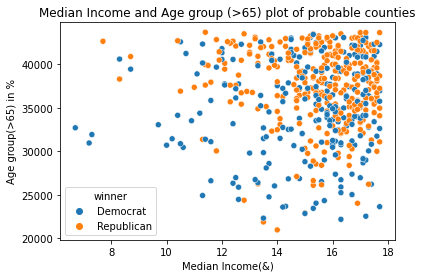

In [158]:
sns.scatterplot(data=possible_counties, 
                y="Median household income", x="Age>65(%)", hue="winner")
plt.title("Median Income and Age group (>65) plot of probable counties")
plt.xlabel("Median Income(&)")
plt.ylabel("Age group(>65) in %")
plt.show()

# Conclusions

<pre>
1. By looking at the results it is clear that Donald Trump from Republicans and Hilary Clinton are right choice to be in the race.
2. Of all the results from the Median Income analysis, it clearly shows that middle class people with moderate level of education has less following among Democrats irrespective of ethinicity.
3. However by looking at the data there is possibilty for Democrats to consider for next elections, that they should consider the counties where more population of young and middle aged people with moderate medium income and 
higher education.
4. Along with the above exploration there is another import factor that might be importnt i.e. the presidential candidate of each party.